# Data Provider Playground

This notebook draws images of examples from our datasets of interests.

To get CIFAR10 to work, be sure you have the cifar10-train file in your data folder. For example:

    scp s[student_id]@student.ssh.inf.ed.ac.uk:/afs/inf.ed.ac.uk/group/teaching/mlp/data/2017-18/cifar10-train.npz .
    
The [mlpractical](https://github.com/CSTR-Edinburgh/mlpractical/blob/mlp2017-8/semester_2_materials/notes/cifar10_100_and_million_song_datasets.md) repo has more information.

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../scripts/runners")

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import modified_data_providers as data_providers

/Users/jessica/miniconda3/envs/mlp/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


### EMNIST

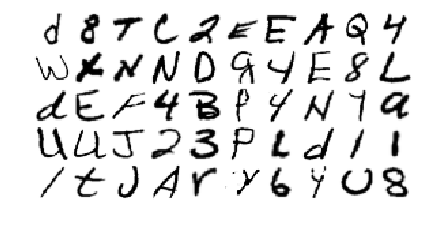

In [2]:
NUM_PER_ROW = 10
IMAGE_WIDTH = 28
BATCH_SIZE = 50

# grab a single minibatch
train_data = data_providers.EMNISTDataProvider('train', batch_size=BATCH_SIZE, flatten=True)
input_batch, target_batch = train_data.next()

# create a canvas with NUM_PER_ROW examples per row, and a few columns
canvas = np.zeros((
    IMAGE_WIDTH * NUM_PER_ROW, 
    IMAGE_WIDTH * (BATCH_SIZE // NUM_PER_ROW))
)

for i, item in enumerate(input_batch):
    start_x = (i % NUM_PER_ROW) * IMAGE_WIDTH
    start_y = (i // NUM_PER_ROW) * IMAGE_WIDTH
    canvas[
        start_x:start_x + IMAGE_WIDTH, 
        start_y:start_y + IMAGE_WIDTH
    ] = item.reshape(IMAGE_WIDTH, IMAGE_WIDTH)


canvas = canvas.T  # I guess EMNIST is flipped.
plt.imshow(canvas, cmap='Greys')

# Some layout things
plt.axis('off')
plt.tight_layout()

plt.show()

## CIFAR10

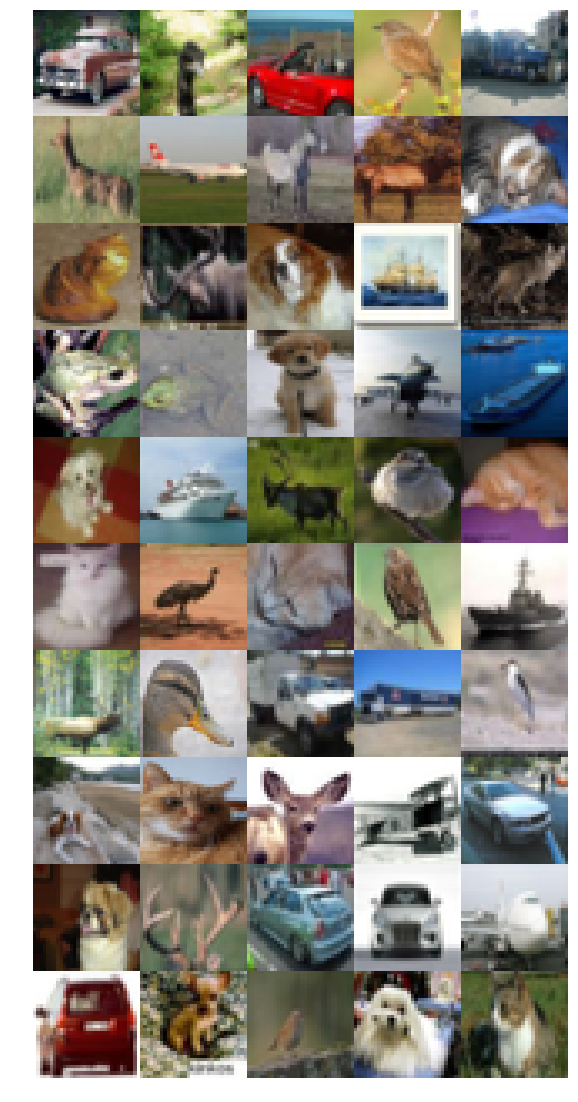

In [3]:
NUM_PER_ROW = 5
IMAGE_WIDTH = 32
IMAGE_CHANNELS = 3
BATCH_SIZE = 50

# grab a single minibatch
train_data = data_providers.CIFAR10DataProvider('train', batch_size=BATCH_SIZE, flatten=True)
input_batch, target_batch = train_data.next()

# create a canvas. CIFAR10 gives data in the form (3 x n x m), so let channels be
# the first dimension
canvas = np.zeros((
    IMAGE_CHANNELS,
    IMAGE_WIDTH * (BATCH_SIZE // NUM_PER_ROW), 
    IMAGE_WIDTH * NUM_PER_ROW, 
))

for i, item in enumerate(input_batch):
    start_x = (i // NUM_PER_ROW) * IMAGE_WIDTH    
    start_y = (i % NUM_PER_ROW) * IMAGE_WIDTH
    canvas[
        :,
        start_x:start_x + IMAGE_WIDTH, 
        start_y:start_y + IMAGE_WIDTH,
    ] = item.reshape(IMAGE_CHANNELS, IMAGE_WIDTH, IMAGE_WIDTH)

    

plt.figure(figsize=(8, 16))
canvas = np.transpose(canvas, (1, 2, 0))  # `imshow` for RGB requires (n x m x 3)
plt.imshow(canvas)

# Get rid of axes
plt.axis('off')
plt.tight_layout()

plt.show()

### CIFAR10 by class

Here I show NUM_PER_ROW examples of each of the 10 classes.

This is a little more complicated. Since each minibatch doesn't include a uniform distribution of classes, I request a few minibatches until I have enough of each class. Once I have a list of enough examples, I draw them.

In [4]:
def get_input_to_show_data(data, ix_to_label):
    input_to_show = [[] for _ in ix_to_label]
    
    # request a few batches until we have enough of each.
    for input_and_target_batch in data:
        for example, target in zip(*input_and_target_batch):
            # check if we have enough of this item
            if len(input_to_show[target]) >= NUM_PER_ROW:
                continue
                
            # if not, append this example
            input_to_show[target].append((example, target))
        
        # And then check if we're done. I could quit earlier and avoid
        # some extra if statements, but meh.
        if all(
            len(i) >= NUM_PER_ROW 
            for i in input_to_show
        ):
            break
    
    return input_to_show

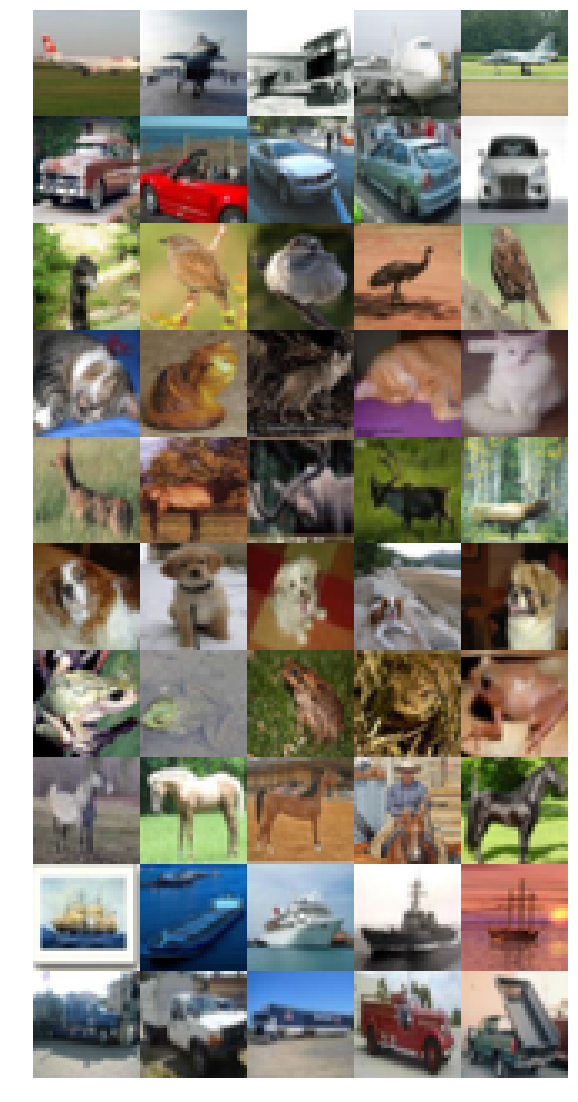

In [5]:
NUM_PER_ROW = 5
IMAGE_WIDTH = 32
IMAGE_CHANNELS = 3

ix_to_label = [
    'airplane',
    'automobile',
    'bird ',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck',
]

BATCH_SIZE = len(ix_to_label) * NUM_PER_ROW  # a heuristic so we pull down enough images

# grab a single minibatch
train_data = data_providers.CIFAR10DataProvider('train', batch_size=BATCH_SIZE, flatten=True)

input_to_show = get_input_to_show_data(train_data, ix_to_label)

# create a canvas. CIFAR10 gives data in the form (3 x n x m), so let channels be
# the first dimension
canvas = np.zeros((
    IMAGE_CHANNELS,
    IMAGE_WIDTH * len(ix_to_label),
    IMAGE_WIDTH * NUM_PER_ROW, 
))


for label_i, examples in enumerate(input_to_show):

    for example_i, (example, target) in enumerate(examples):
        start_x = label_i * IMAGE_WIDTH    
        start_y = example_i * IMAGE_WIDTH
        canvas[
            :,
            start_x:start_x + IMAGE_WIDTH, 
            start_y:start_y + IMAGE_WIDTH,
        ] = example.reshape(IMAGE_CHANNELS, IMAGE_WIDTH, IMAGE_WIDTH)

    

plt.figure(figsize=(8, 16))
canvas = np.transpose(canvas, (1, 2, 0))  # `imshow` for RGB requires (n x m x 3)
plt.imshow(canvas)

# Get rid of axes
plt.axis('off')
plt.tight_layout()

plt.show()

# SmallNORB

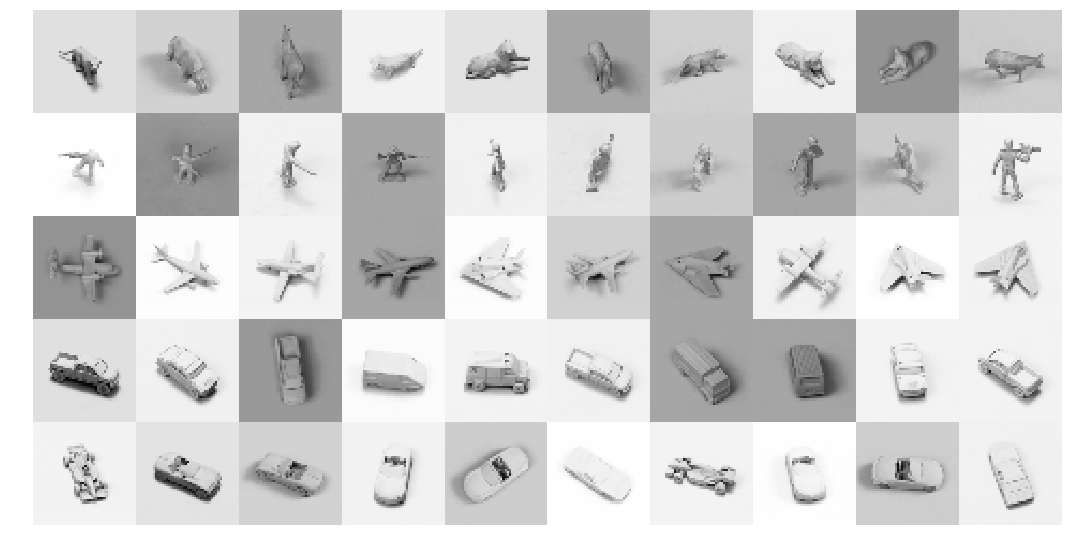

In [6]:
NUM_PER_ROW = 10
IMAGE_WIDTH = 48
IMAGE_CHANNELS = 1

plt.figure(figsize=(15, 10))

ix_to_label = [
    'animals',
    'human figures',
    'airplanes',
    'trucks',
    'cars',
]

BATCH_SIZE = len(ix_to_label) * NUM_PER_ROW  # a heuristic so we pull down enough images

# grab a single minibatch
train_data = data_providers.SmallNORBDataProvider('train', batch_size=BATCH_SIZE, flatten=True)
input_batch, target_batch = train_data.next()

# create a canvas with NUM_PER_ROW examples per row, and a few columns
canvas = np.zeros((
    IMAGE_WIDTH * len(ix_to_label),
    IMAGE_WIDTH * NUM_PER_ROW, 
))

# grab a single minibatch
train_data = data_providers.SmallNORBDataProvider('train', batch_size=BATCH_SIZE, flatten=True)

input_to_show = get_input_to_show_data(train_data, ix_to_label)

for label_i, examples in enumerate(input_to_show):
    for example_i, (example, target) in enumerate(examples):
        start_x = label_i * IMAGE_WIDTH    
        start_y = example_i * IMAGE_WIDTH
        
        canvas[
            start_x:start_x + IMAGE_WIDTH, 
            start_y:start_y + IMAGE_WIDTH,
        ] = example.reshape(IMAGE_CHANNELS, IMAGE_WIDTH, IMAGE_WIDTH)

canvas = 1 - canvas
plt.imshow(canvas, cmap='Greys')

# Some layout things
plt.axis('off')
plt.tight_layout()

plt.show()

(50, 48, 48, 1)


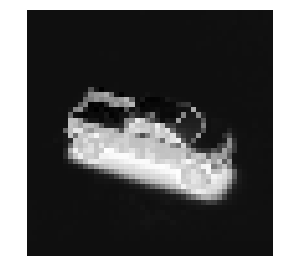

In [9]:
train_data = data_providers.SmallNORBDataProvider('train', batch_size=BATCH_SIZE)

inputs, target = next(train_data)

print(inputs.shape)

plt.imshow(1 - inputs[0, :, :, 0], cmap='Greys')

# Some layout things
plt.axis('off')
plt.tight_layout()

plt.show()

# SmallNORB 32x32

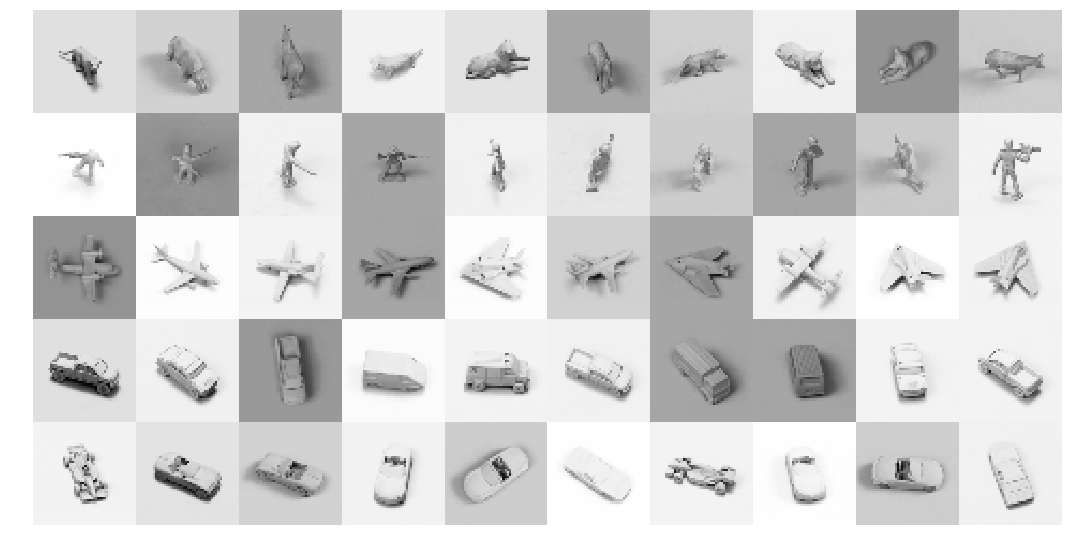

In [8]:
NUM_PER_ROW = 10
IMAGE_WIDTH = 48
IMAGE_CHANNELS = 1

plt.figure(figsize=(15, 10))

ix_to_label = [
    'animals',
    'human figures',
    'airplanes',
    'trucks',
    'cars',
]

BATCH_SIZE = len(ix_to_label) * NUM_PER_ROW  # a heuristic so we pull down enough images

# grab a single minibatch
train_data = data_providers.SmallNORBDataProvider('train', batch_size=BATCH_SIZE, flatten=True)
input_batch, target_batch = train_data.next()

# create a canvas with NUM_PER_ROW examples per row, and a few columns
canvas = np.zeros((
    IMAGE_WIDTH * len(ix_to_label),
    IMAGE_WIDTH * NUM_PER_ROW, 
))

# grab a single minibatch
train_data = data_providers.SmallNORBDataProvider('train', batch_size=BATCH_SIZE, flatten=True)

input_to_show = get_input_to_show_data(train_data, ix_to_label)

for label_i, examples in enumerate(input_to_show):
    for example_i, (example, target) in enumerate(examples):
        start_x = label_i * IMAGE_WIDTH    
        start_y = example_i * IMAGE_WIDTH
        
        canvas[
            start_x:start_x + IMAGE_WIDTH, 
            start_y:start_y + IMAGE_WIDTH,
        ] = example.reshape(IMAGE_CHANNELS, IMAGE_WIDTH, IMAGE_WIDTH)

canvas = 1 - canvas
plt.imshow(canvas, cmap='Greys')

# Some layout things
plt.axis('off')
plt.tight_layout()

plt.show()

## SmallNORB multitask

In [8]:
NUM_PER_ROW = 10
IMAGE_WIDTH = 28
BATCH_SIZE = 50

train_data = data_providers.MTLSmallNORBDataProvider('train', batch_size=BATCH_SIZE, flatten=True, num_devices=1)
input_batch, target_batch = train_data.next()

print(target_batch)

[[[ 3 16]
  [ 3 14]
  [ 2 18]
  [ 4 10]
  [ 0 12]
  [ 0 12]
  [ 0 28]
  [ 4 14]
  [ 2 14]
  [ 4 32]
  [ 2 34]
  [ 0  2]
  [ 4  8]
  [ 1  8]
  [ 3 10]
  [ 0 20]
  [ 4  4]
  [ 0 10]
  [ 0 20]
  [ 3 18]
  [ 4 14]
  [ 0 14]
  [ 2 20]
  [ 0  4]
  [ 3 18]
  [ 2  0]
  [ 2 22]
  [ 0 16]
  [ 4 34]
  [ 1 26]
  [ 2 34]
  [ 0 22]
  [ 2 32]
  [ 4 10]
  [ 4 18]
  [ 3 16]
  [ 2 28]
  [ 3 12]
  [ 0 28]
  [ 1 20]
  [ 4 28]
  [ 3 28]
  [ 4 20]
  [ 1 10]
  [ 3 10]
  [ 0 22]
  [ 3 32]
  [ 0  0]
  [ 4 10]
  [ 1  8]]]
